In [1]:
import os
os.getcwd()

'C:\\Users\\gopal\\Desktop\\Machine Learning\\housing prices'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('train.csv')

In [4]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
(dataset['BsmtFinSF1'] + dataset['BsmtFinSF2'] + dataset['BsmtUnfSF'] == dataset['TotalBsmtSF']).value_counts()

True    1460
dtype: int64

In [6]:
(dataset['1stFlrSF'] + dataset['2ndFlrSF'] + dataset['LowQualFinSF'] == dataset['GrLivArea']).value_counts()

True    1460
dtype: int64

In [7]:
dataset['a']=dataset['BedroomAbvGr'] + dataset['KitchenAbvGr']
print(dataset[['a','TotRmsAbvGrd','SalePrice']].corr())
dataset.drop(['a'],axis=1,inplace=True)

                     a  TotRmsAbvGrd  SalePrice
a             1.000000      0.686476   0.121048
TotRmsAbvGrd  0.686476      1.000000   0.533723
SalePrice     0.121048      0.533723   1.000000


In [8]:
dataset[['MoSold','SalePrice']].corr()

,MoSold,SalePrice
MoSold,1.000000,0.046432
SalePrice,0.046432,1.000000


In [9]:
dataset.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [10]:
cat_dataset = dataset.select_dtypes(include=['object']).copy()
#dataset.boxplot('SalePrice','MSSubClass')  #120+150+160 , 80+85+180 , 30+70 1-2 story 1945 and older , 90+190 , 45+75+40

In [11]:
cat_dataset.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [12]:
for i in dataset.columns:
    print(i)
    print(dataset[i].isnull().value_counts())
    print("")

Id
False    1460
Name: Id, dtype: int64

MSSubClass
False    1460
Name: MSSubClass, dtype: int64

MSZoning
False    1460
Name: MSZoning, dtype: int64

LotFrontage
False    1201
True      259
Name: LotFrontage, dtype: int64

LotArea
False    1460
Name: LotArea, dtype: int64

Street
False    1460
Name: Street, dtype: int64

Alley
True     1369
False      91
Name: Alley, dtype: int64

LotShape
False    1460
Name: LotShape, dtype: int64

LandContour
False    1460
Name: LandContour, dtype: int64

Utilities
False    1460
Name: Utilities, dtype: int64

LotConfig
False    1460
Name: LotConfig, dtype: int64

LandSlope
False    1460
Name: LandSlope, dtype: int64

Neighborhood
False    1460
Name: Neighborhood, dtype: int64

Condition1
False    1460
Name: Condition1, dtype: int64

Condition2
False    1460
Name: Condition2, dtype: int64

BldgType
False    1460
Name: BldgType, dtype: int64

HouseStyle
False    1460
Name: HouseStyle, dtype: int64

OverallQual
False    1460
Name: OverallQual, dtype: i

In [13]:
num_dataset = ['LotFrontage', 'MasVnrArea']
for i in num_dataset:
    mean = dataset[i].astype("float").mean(axis=0)
    print("average of {} is :".format(i),mean)
    dataset[i].replace(np.nan,mean,inplace=True)
    print(dataset[i].isnull().value_counts())
    print(" ")

average of LotFrontage is : 70.04995836802665
False    1460
Name: LotFrontage, dtype: int64
 
average of MasVnrArea is : 103.68526170798899
False    1460
Name: MasVnrArea, dtype: int64
 


In [14]:
cat_dataset_missing = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'
                      ,'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'
                      ,'PoolQC', 'Fence', 'MiscFeature']
for i in cat_dataset_missing:
    print(i)
    print(dataset[i].value_counts())
    print("")

Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64

MasVnrType
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

GarageYrBlt
2005.0  

In [15]:
dataset['GarageYrBlt'].replace(np.nan,2005,inplace=True)
dataset['Electrical'].replace(np.nan,'SBrkr',inplace=True)
dataset['MiscFeature'].replace(np.nan,'Othr',inplace=True)

In [16]:
cat_dataset_missing1 = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'
                      , 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'
                      ,'PoolQC', 'Fence']
for i in cat_dataset_missing1:
    dataset[i].replace(np.nan,'None',inplace=True)
    print(dataset[i].isnull().value_counts())
    print("")

False    1460
Name: Alley, dtype: int64

False    1460
Name: MasVnrType, dtype: int64

False    1460
Name: BsmtQual, dtype: int64

False    1460
Name: BsmtCond, dtype: int64

False    1460
Name: BsmtExposure, dtype: int64

False    1460
Name: BsmtFinType1, dtype: int64

False    1460
Name: BsmtFinType2, dtype: int64

False    1460
Name: FireplaceQu, dtype: int64

False    1460
Name: GarageType, dtype: int64

False    1460
Name: GarageFinish, dtype: int64

False    1460
Name: GarageQual, dtype: int64

False    1460
Name: GarageCond, dtype: int64

False    1460
Name: PoolQC, dtype: int64

False    1460
Name: Fence, dtype: int64



In [17]:
#alley ..... NO alley access
#masvnrtype ..... None
#bsmt .... NA
#electrical ....Sbrkr
#fireplacequ ....NA
#garage . ...NA
#poolq .....NA(>80%) ....drop
#fence .....(NA >80%)drop
#miscfeature .......(NA>80%) drop

In [18]:
#for i in cat_dataset.columns:
#    print(i)
#    print(cat_dataset[i].value_counts())
#    print("")

In [19]:
#feature engineering
#1. LotTotalArea = LotFrontage + LotArea
#2. NoYearRemod = current year - YearRemodAdd
#3. Remove BsmtFinSf1, BsmtFinSF2, BsmtUnfSF
#4. Remove 1stFlrSF, 2ndFlrSF, LowQualFinSF
#5. TotalBath = BsmtFullBath + BsmtHalfBath + FullBath + HalfBath
#6. Remove BedroomAbvGr, KitchenAbvGr
#7. NoYrGarageBlt = currentyear - GarageYrBlt
#8. TotalPorchSF = OpenPorchSF + EnclosedPorchSF + 3SsnPorch + ScreenPorch
#9. Remove MoSold
#10. NoYrSold = currentyear - YrSold
# grouping excellent, good in good(Gd) and average, fair in average(TA)
# functionality in (Min1, Min2, Moderate) in Min and (Maj1, Maj2, Sev, Sal) in Maj
#condition 1 and condition 2.......RRAe,RRNn,RRNe,RRAn...RR and PosN,PosA....Pos

In [20]:
dataset['CurrentYear'] = 2020

In [21]:
dataset['HouseAge'] = dataset['CurrentYear'] - dataset['YearRemodAdd']
dataset['GarageAge'] = dataset['CurrentYear'] - dataset['GarageYrBlt']
dataset['NoYearSold'] = dataset['CurrentYear'] - dataset['YrSold']
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CurrentYear,HouseAge,GarageAge,NoYearSold
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,Othr,0,2,2008,WD,Normal,208500,2020,17,17.0,12
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,Othr,0,5,2007,WD,Normal,181500,2020,44,44.0,13
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,Othr,0,9,2008,WD,Normal,223500,2020,18,19.0,12
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,Othr,0,2,2006,WD,Abnorml,140000,2020,50,22.0,14
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,Othr,0,12,2008,WD,Normal,250000,2020,20,20.0,12


In [22]:
dataset.drop(['YearRemodAdd','GarageYrBlt','YearBuilt','YrSold','CurrentYear'],axis=1,inplace=True)
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,HouseAge,GarageAge,NoYearSold
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,Othr,0,2,WD,Normal,208500,17,17.0,12
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,Othr,0,5,WD,Normal,181500,44,44.0,13
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,Othr,0,9,WD,Normal,223500,18,19.0,12
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,Othr,0,2,WD,Abnorml,140000,50,22.0,14
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,Othr,0,12,WD,Normal,250000,20,20.0,12


6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64


,MoSold,SalePrice
0,1,183256.258621
1,2,177882.000000
2,3,183253.924528
3,4,171503.262411
4,5,172307.269608
5,6,177395.735178
6,7,186331.192308
7,8,184651.827869
8,9,195683.206349
9,10,179563.977528


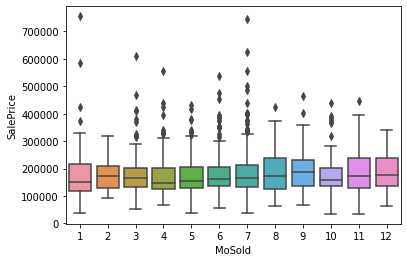

In [23]:
sns.boxplot(dataset['MoSold'],dataset['SalePrice'])
print(dataset['MoSold'].value_counts())#Most of the cars are sold in may june july
df_test = dataset[['MoSold','SalePrice']]
df_test.groupby(['MoSold'],as_index=False).mean()

In [24]:
dataset.drop(['MoSold'],axis=1,inplace=True)

In [25]:
dataset.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','1stFlrSF','2ndFlrSF','LowQualFinSF'],axis=1,inplace=True)

In [26]:
dataset['LotTotalArea'] = dataset['LotFrontage'] + dataset['LotArea']
dataset.drop(['LotFrontage','LotArea'],axis=1,inplace=True)
dataset.head()

,Id,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,HouseAge,GarageAge,NoYearSold,LotTotalArea
0,1,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,Othr,0,WD,Normal,208500,17,17.0,12,8515.0
1,2,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,Othr,0,WD,Normal,181500,44,44.0,13,9680.0
2,3,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,Othr,0,WD,Normal,223500,18,19.0,12,11318.0
3,4,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,Othr,0,WD,Abnorml,140000,50,22.0,14,9610.0
4,5,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,Othr,0,WD,Normal,250000,20,20.0,12,14344.0


In [27]:
dataset['TotalBath'] = dataset['BsmtFullBath'] + dataset['BsmtHalfBath'] + dataset['FullBath'] +dataset['HalfBath']
dataset[['TotalBath','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','SalePrice']].corr()
dataset.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],axis=1,inplace=True)

In [28]:
dataset[['BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','SalePrice']].corr()
dataset.drop(['BedroomAbvGr','KitchenAbvGr'],axis=1,inplace=True)

In [29]:
dataset.head()

,Id,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,HouseAge,GarageAge,NoYearSold,LotTotalArea,TotalBath
0,1,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,1710,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,Othr,0,WD,Normal,208500,17,17.0,12,8515.0,4
1,2,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,1262,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,Othr,0,WD,Normal,181500,44,44.0,13,9680.0,3
2,3,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,1786,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,Othr,0,WD,Normal,223500,18,19.0,12,11318.0,4
3,4,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,1717,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,Othr,0,WD,Abnorml,140000,50,22.0,14,9610.0,2
4,5,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,2198,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,Othr,0,WD,Normal,250000,20,20.0,12,14344.0,4


In [30]:
dataset['TotalPorchArea'] = dataset['OpenPorchSF'] + dataset['EnclosedPorch'] + dataset['3SsnPorch'] + dataset['ScreenPorch']
dataset.drop(['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'],axis=1,inplace=True)

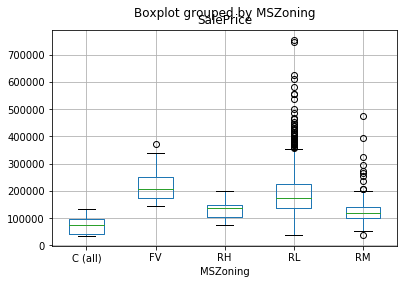

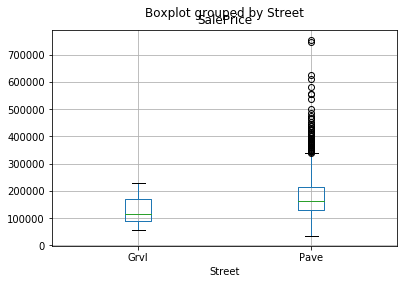

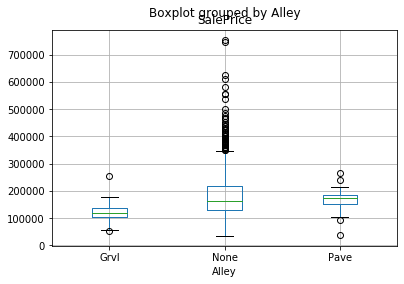

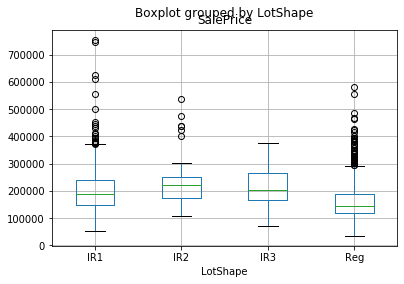

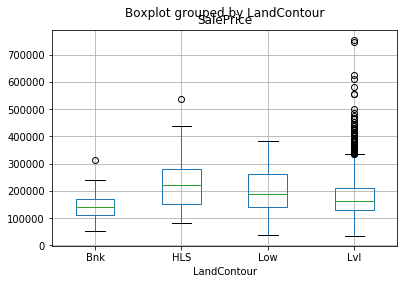

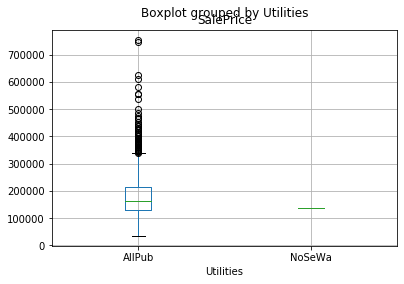

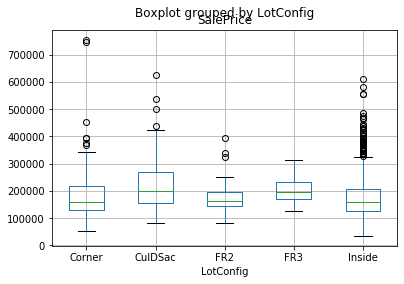

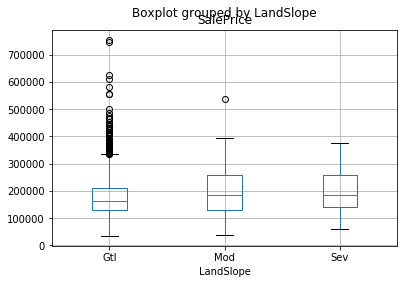

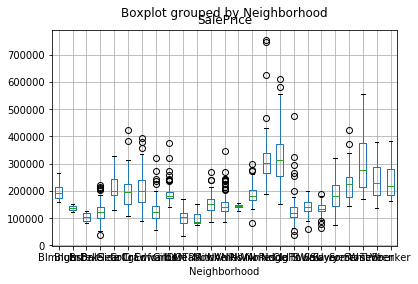

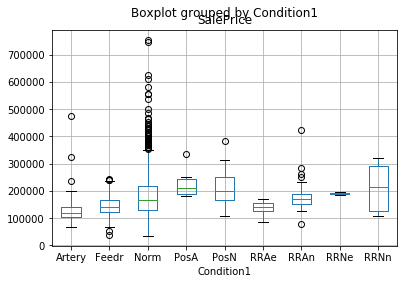

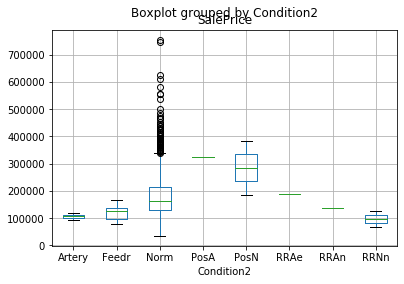

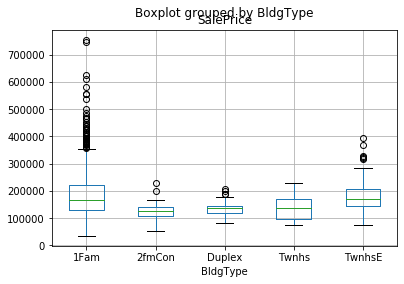

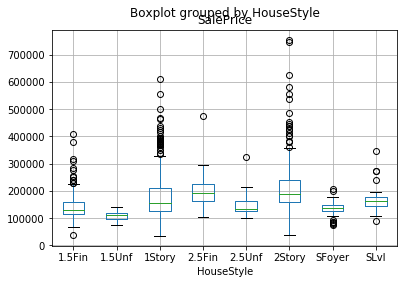

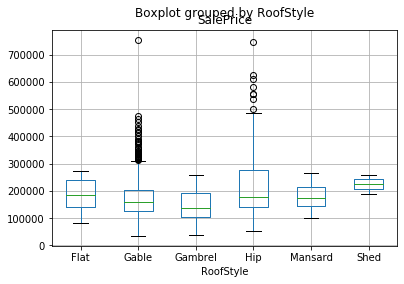

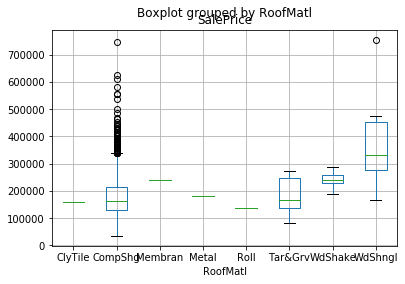

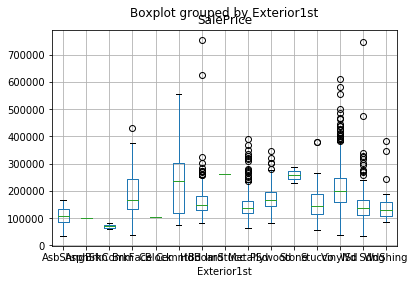

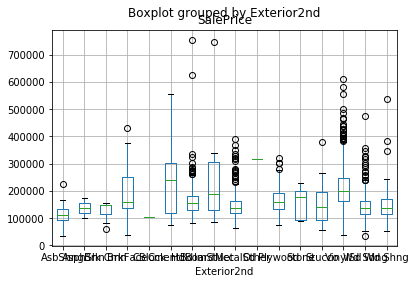

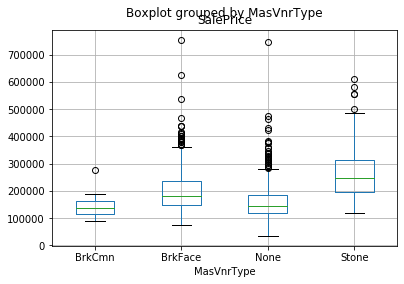

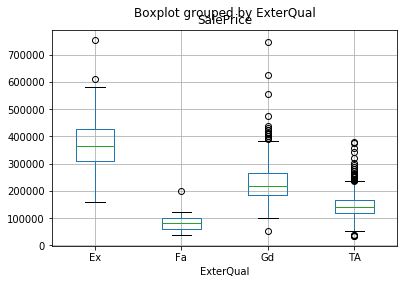

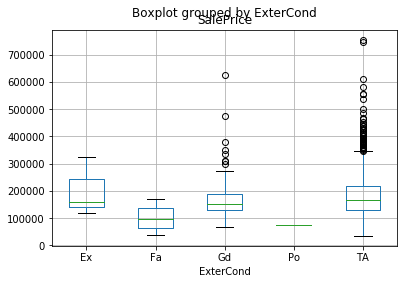

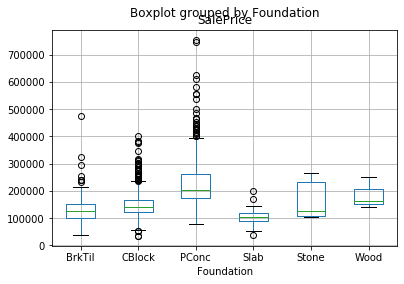

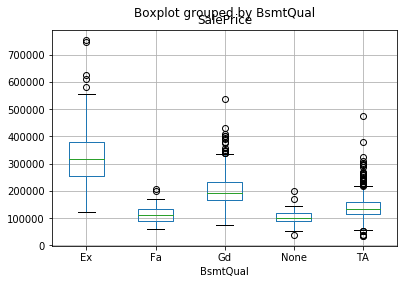

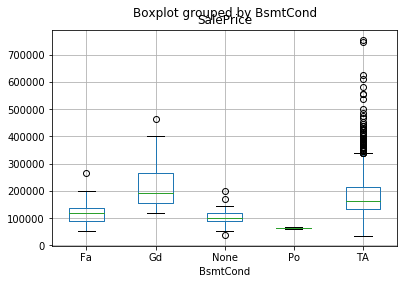

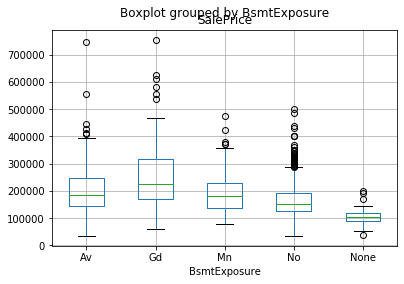

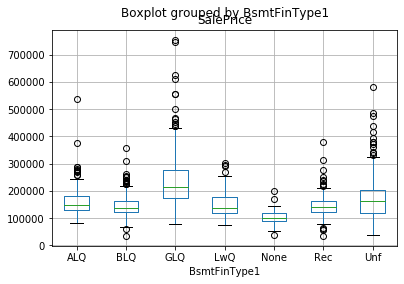

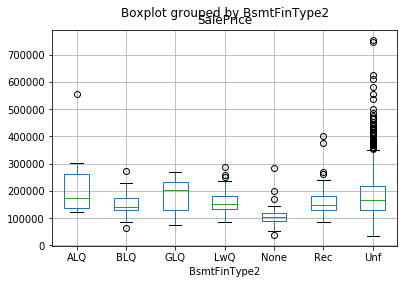

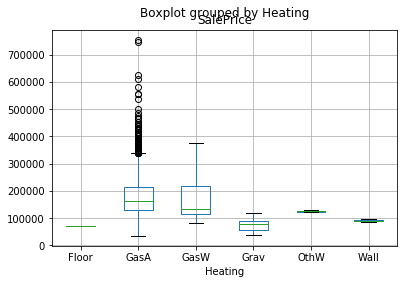

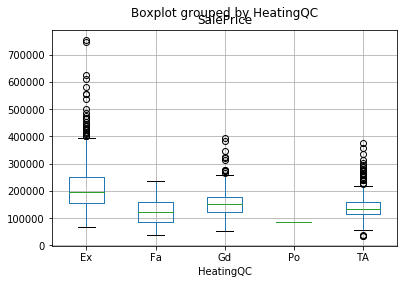

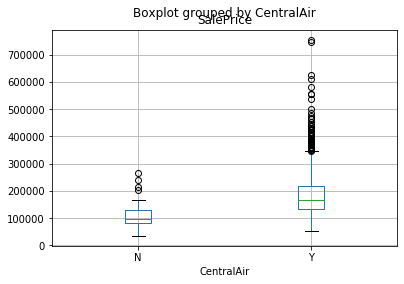

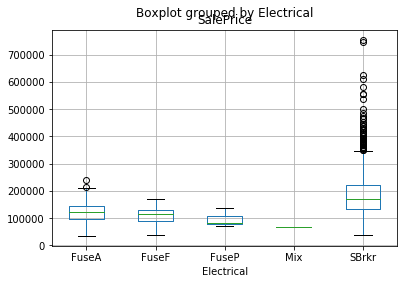

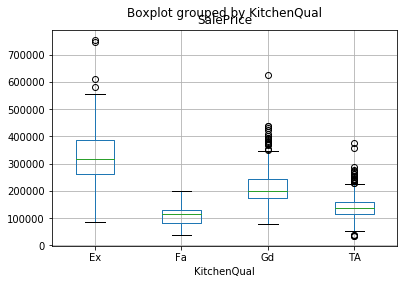

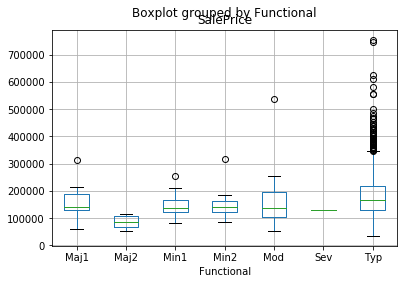

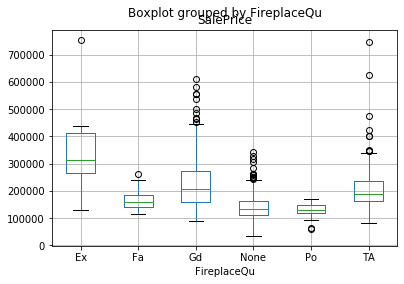

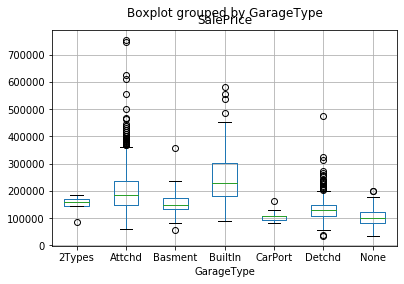

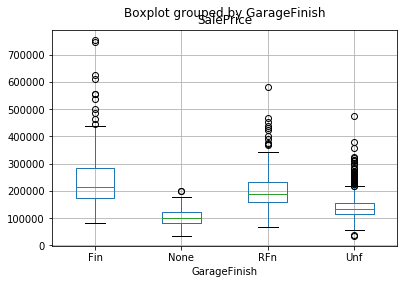

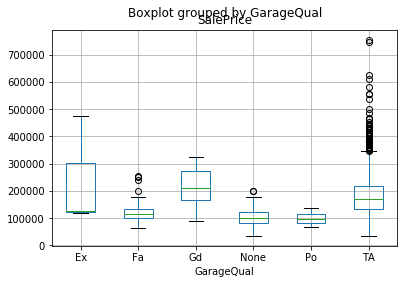

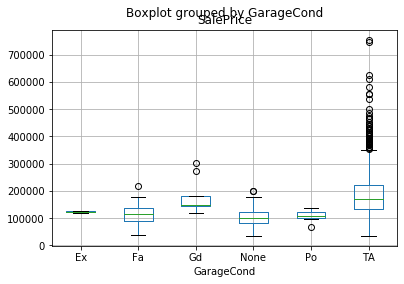

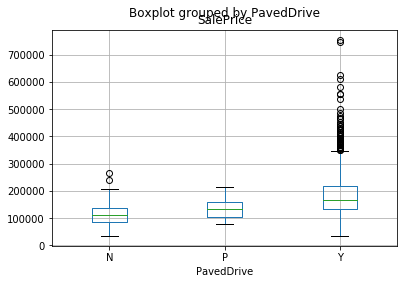

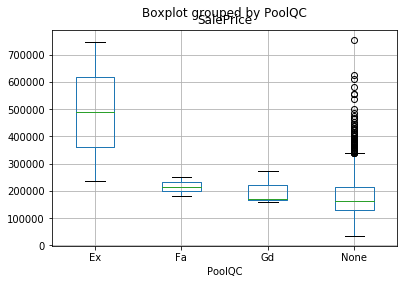

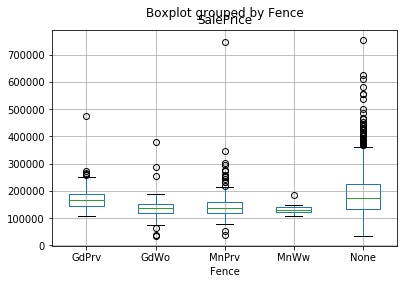

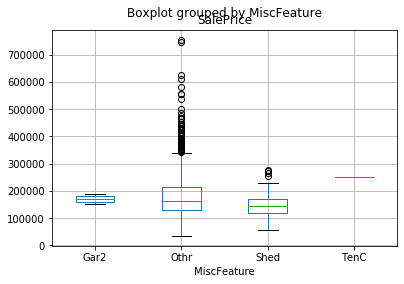

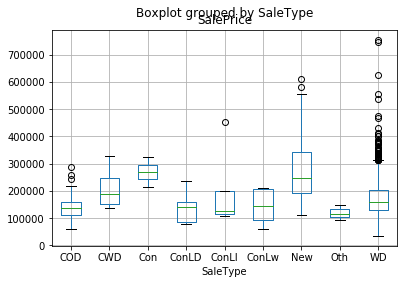

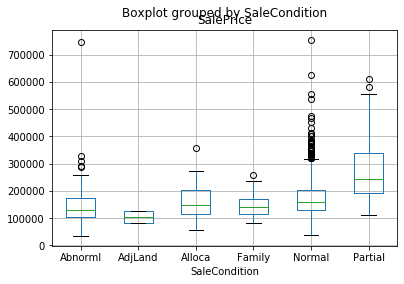

In [31]:
#almost houses are central air facility
for i in cat_dataset.columns:
    dataset.boxplot('SalePrice',i)
    plt.show()

In [32]:
dataset['Fence'] = dataset['Fence'].replace(('GdPrv','MnPrv','GdWo','MnWw','None'),(4,3,2,1,0))
dataset['Fence'].value_counts()

0    1179
3     157
4      59
2      54
1      11
Name: Fence, dtype: int64

In [33]:
dataset['PoolQC'] = dataset['PoolQC'].replace(('Ex','Gd','TA','Fa','None'),(4,3,2,1,0))
dataset['PoolQC'].value_counts()

0    1453
3       3
4       2
1       2
Name: PoolQC, dtype: int64

In [34]:
dataset['PavedDrive'] = dataset['PavedDrive'].replace(('Y','P','N'),(2,1,0))
dataset['PavedDrive'].value_counts()

2    1340
0      90
1      30
Name: PavedDrive, dtype: int64

In [35]:
dataset['GarageCond'] = dataset['GarageCond'].replace(('Ex','Gd','TA','Fa','Po','None'),(5,4,3,2,1,0))
dataset['GarageCond'].value_counts()

3    1326
0      81
2      35
4       9
1       7
5       2
Name: GarageCond, dtype: int64

In [36]:
dataset['GarageQual'] = dataset['GarageQual'].replace(('Ex','Gd','TA','Fa','Po','None'),(5,4,3,2,1,0))
dataset['GarageQual'].value_counts()

3    1311
0      81
2      48
4      14
5       3
1       3
Name: GarageQual, dtype: int64

In [37]:
dataset['GarageFinish'] = dataset['GarageFinish'].replace(('Fin','RFn','Unf','None'),(3,2,1,0))
dataset['GarageFinish'].value_counts()

1    605
2    422
3    352
0     81
Name: GarageFinish, dtype: int64

In [38]:
dataset['FireplaceQu'] = dataset['FireplaceQu'].replace(('Ex','Gd','TA','Fa','Po','None'),(5,4,3,2,1,0))
dataset['FireplaceQu'].value_counts()

0    690
4    380
3    313
2     33
5     24
1     20
Name: FireplaceQu, dtype: int64

In [39]:
dataset['Functional'] = dataset['Functional'].replace(('Min2','Min1','Maj1','Maj2'),('Min','Min','Maj','Maj'))
dataset['Functional'] = dataset['Functional'].replace(('Typ','Min','Mod','Maj','Sev','Sal'),(5,4,3,2,1,0))
dataset['Functional'].value_counts()

5    1360
4      65
2      19
3      15
1       1
Name: Functional, dtype: int64

In [40]:
dataset['KitchenQual'] = dataset['KitchenQual'].replace(('Ex','Gd','TA','Fa','Po','None'),(5,4,3,2,1,0))
dataset['KitchenQual'].value_counts()

3    735
4    586
5    100
2     39
Name: KitchenQual, dtype: int64

In [41]:
dataset['Electrical'] = dataset['Electrical'].replace(('SBrkr','FuseA','FuseF','FuseP','Mix','None'),(5,4,3,2,1,0))
dataset['Electrical'].value_counts()

5    1335
4      94
3      27
2       3
1       1
Name: Electrical, dtype: int64

In [42]:
dataset['CentralAir'] = dataset['CentralAir'].replace(('Y','N'),(1,0))
dataset['CentralAir'].value_counts()

1    1365
0      95
Name: CentralAir, dtype: int64

In [43]:
dataset['HeatingQC'] = dataset['HeatingQC'].replace(('Ex','Gd','TA','Fa','Po','None'),(5,4,3,2,1,0))
dataset['HeatingQC'].value_counts()

5    741
3    428
4    241
2     49
1      1
Name: HeatingQC, dtype: int64

In [44]:
dataset['BsmtFinType2'] = dataset['BsmtFinType2'].replace(('GLQ','ALQ','BLQ','Rec','LwQ','Unf','None'),(5,4,3,3,2,1,0))
dataset['BsmtFinType1'].value_counts()

Unf     430
GLQ     418
ALQ     220
BLQ     148
Rec     133
LwQ      74
None     37
Name: BsmtFinType1, dtype: int64

In [45]:
dataset['BsmtFinType1'] = dataset['BsmtFinType1'].replace(('GLQ','ALQ','BLQ','Rec','LwQ','Unf','None'),(5,4,3,3,2,1,0))
dataset['BsmtFinType1'].value_counts()

1    430
5    418
3    281
4    220
2     74
0     37
Name: BsmtFinType1, dtype: int64

In [46]:
dataset['BsmtExposure'] = dataset['BsmtExposure'].replace(('Gd','Av','Mn','No','None'),(4,3,2,1,0))
dataset['BsmtExposure'].value_counts()

1    953
3    221
4    134
2    114
0     38
Name: BsmtExposure, dtype: int64

In [47]:
dataset['BsmtCond'] = dataset['BsmtCond'].replace(('Ex','Gd','TA','Fa','Po','None'),(5,4,3,2,1,0))
dataset['BsmtCond'].value_counts()

3    1311
4      65
2      45
0      37
1       2
Name: BsmtCond, dtype: int64

In [48]:
dataset['BsmtQual'] = dataset['BsmtQual'].replace(('Ex','Gd','TA','Fa','Po','None'),(5,4,3,2,1,0))
dataset['BsmtQual'].value_counts()

3    649
4    618
5    121
0     37
2     35
Name: BsmtQual, dtype: int64

In [49]:
dataset['ExterQual'] = dataset['ExterQual'].replace(('Ex','Gd','TA','Fa','Po'),(5,4,3,2,1))

In [50]:
dataset['ExterQual'].value_counts()

3    906
4    488
5     52
2     14
Name: ExterQual, dtype: int64

In [51]:
dataset['ExterCond'] = dataset['ExterCond'].replace(('Ex','Gd','TA','Fa','Po'),(5,4,3,2,1))
dataset['ExterCond'].value_counts()

3    1282
4     146
2      28
5       3
1       1
Name: ExterCond, dtype: int64

In [52]:
dataset.head()

,Id,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,HouseAge,GarageAge,NoYearSold,LotTotalArea,TotalBath,TotalPorchArea
0,1,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,5,1,856,GasA,5,1,5,1710,4,8,5,0,0,Attchd,2,2,548,3,3,2,0,0,0,0,Othr,0,WD,Normal,208500,17,17.0,12,8515.0,4,61
1,2,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,4,1,1262,GasA,5,1,5,1262,3,6,5,1,3,Attchd,2,2,460,3,3,2,298,0,0,0,Othr,0,WD,Normal,181500,44,44.0,13,9680.0,3,0
2,3,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,5,1,920,GasA,5,1,5,1786,4,6,5,1,3,Attchd,2,2,608,3,3,2,0,0,0,0,Othr,0,WD,Normal,223500,18,19.0,12,11318.0,4,42
3,4,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,4,1,756,GasA,4,1,5,1717,4,7,5,1,4,Detchd,1,3,642,3,3,2,0,0,0,0,Othr,0,WD,Abnorml,140000,50,22.0,14,9610.0,2,307
4,5,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,5,1,1145,GasA,5,1,5,2198,4,9,5,1,3,Attchd,2,3,836,3,3,2,192,0,0,0,Othr,0,WD,Normal,250000,20,20.0,12,14344.0,4,84


In [53]:
exp = ['MSSubClass','MSZoning','Street','Alley','LotShape','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st'
       ,'Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','GarageType','MiscFeature','SaleType','SaleCondition']
for i in exp:
    print(i)
    print(dataset[i].value_counts())
    print("")

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Street
Pave    1454
Grvl       6
Name: Street, dtype: int64

Alley
None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor   

In [54]:
#drop street,utilities,
dataset['Condition1'] = dataset['Condition1'].replace(('RRAn','RRAe','RRNn','RRNe','PosA','PosN'),('RR','RR','RR','RR','Pos','Pos'))
dataset['Condition2'] = dataset['Condition2'].replace(('RRAn','RRAe','RRNn','RRNe','PosA','PosN'),('RR','RR','RR','RR','Pos','Pos'))
print(dataset['Condition1'].value_counts())
print(dataset['Condition2'].value_counts())

Norm      1260
Feedr       81
Artery      48
RR          44
Pos         27
Name: Condition1, dtype: int64
Norm      1445
Feedr        6
RR           4
Pos          3
Artery       2
Name: Condition2, dtype: int64


In [55]:
dataset['RoofMatl'] = dataset['RoofMatl'].replace(('Metal','Roll','ClyTile','Membran'),('Other','Other','Other','Other'))
dataset['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Other         4
Name: RoofMatl, dtype: int64

In [56]:
dataset['Exterior1st'] = dataset['Exterior1st'].replace(('Stone','BrkComm','AsphShn','CBlock','ImStucc'),('Other','Other','Other','Other','Other'))
dataset['Exterior2nd'] = dataset['Exterior2nd'].replace(('Stone','BrkComm','AsphShn','CBlock','ImStucc'),('Other','Other','Other','Other','Other'))
print(dataset['Exterior1st'].value_counts())
print(dataset['Exterior2nd'].value_counts())

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Other        7
Name: Exterior1st, dtype: int64
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
Other       20
AsbShng     20
Brk Cmn      7
Name: Exterior2nd, dtype: int64


In [57]:
dataset['Heating'] = dataset['Heating'].replace(('Floor','Grav','Wall','OthW'),('Other','Other','Other','Other'))
dataset['Heating'].value_counts()

GasA     1428
GasW       18
Other      14
Name: Heating, dtype: int64

In [58]:
dataset['MSSubClass'] = dataset['MSSubClass'].astype('O')

In [59]:
dataset.head()

,Id,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,HouseAge,GarageAge,NoYearSold,LotTotalArea,TotalBath,TotalPorchArea
0,1,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,1,5,1,856,GasA,5,1,5,1710,4,8,5,0,0,Attchd,2,2,548,3,3,2,0,0,0,0,Othr,0,WD,Normal,208500,17,17.0,12,8515.0,4,61
1,2,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,4,1,1262,GasA,5,1,5,1262,3,6,5,1,3,Attchd,2,2,460,3,3,2,298,0,0,0,Othr,0,WD,Normal,181500,44,44.0,13,9680.0,3,0
2,3,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,5,1,920,GasA,5,1,5,1786,4,6,5,1,3,Attchd,2,2,608,3,3,2,0,0,0,0,Othr,0,WD,Normal,223500,18,19.0,12,11318.0,4,42
3,4,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,4,1,4,1,756,GasA,4,1,5,1717,4,7,5,1,4,Detchd,1,3,642,3,3,2,0,0,0,0,Othr,0,WD,Abnorml,140000,50,22.0,14,9610.0,2,307
4,5,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,3,5,1,1145,GasA,5,1,5,2198,4,9,5,1,3,Attchd,2,3,836,3,3,2,192,0,0,0,Othr,0,WD,Normal,250000,20,20.0,12,14344.0,4,84


In [60]:
#Saletype, salecondition, miscfeature, garagetype, heating, foundation, masvnrtype, exterior2nd, exterior1st, roofmtl, roofstyle,
#housestyle, bldgtype, condition1,condition2, neighborhood, landslope, lotconfig, landcontour, lotshape, alley, mszoning, mssubclass

In [61]:
dataset.drop(['Utilities','Street'],axis=1,inplace=True)

In [62]:
dataset.dtypes

Id                  int64
MSSubClass         object
MSZoning           object
Alley              object
LotShape           object
LandContour        object
LotConfig          object
LandSlope          object
Neighborhood       object
Condition1         object
Condition2         object
BldgType           object
HouseStyle         object
OverallQual         int64
OverallCond         int64
RoofStyle          object
RoofMatl           object
Exterior1st        object
Exterior2nd        object
MasVnrType         object
MasVnrArea        float64
ExterQual          object
ExterCond           int64
Foundation         object
BsmtQual            int64
BsmtCond            int64
BsmtExposure        int64
BsmtFinType1        int64
BsmtFinType2        int64
TotalBsmtSF         int64
Heating            object
HeatingQC          object
CentralAir          int64
Electrical         object
GrLivArea           int64
KitchenQual        object
TotRmsAbvGrd        int64
Functional         object
Fireplaces  

In [63]:
dataset[['ExterQual','HeatingQC','Electrical','KitchenQual','Functional']]=dataset[['ExterQual','HeatingQC','Electrical','KitchenQual','Functional']].astype(int)

In [64]:
dataset = pd.get_dummies(dataset,drop_first=True)

In [65]:
dataset.head()

,Id,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,CentralAir,Electrical,GrLivArea,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,Fence,MiscVal,SalePrice,HouseAge,GarageAge,NoYearSold,LotTotalArea,TotalBath,TotalPorchArea,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_Pos,Condition1_RR,Condition2_Feedr,Condition2_Norm,Condition2_Pos,Condition2_RR,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Other,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Other,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,7,5,196.0,4,3,4,3,1,5,1,856,5,1,5,1710,4,8,5,0,0,2,2,548,3,3,2,0,0,0,0,0,208500,17,17.0,12,8515.0,4,61,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,6,8,0.0,3,3,4,3,4,4,1,1262,5,1,5,1262,3,6,5,1,3,2,2,460,3,3,2,298,0,0,0,0,181500,44,44.0,13,9680.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,7,5,162.0,4,3,4,3,2,5,1,920,5,1,5,1786,4,6,5,1,3,2,2,608,3,3,2,0,0,0,0,0,223500,18,19.0,12,11318.0,4,42,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,7,5,0.0,3,3,3,4,1,4,1,756,4,1,5,1717,4,7,5,1,4,1,3,642,3,3,2,0,0,0,0,0,140000,50,2

In [66]:
dataset.shape

(1460, 176)

In [67]:
dataset['SalePrice'] = np.log1p(dataset['SalePrice'])

In [68]:
dataset.to_csv('final_dataset.csv')

In [69]:
dataset.head()

,Id,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,CentralAir,Electrical,GrLivArea,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,Fence,MiscVal,SalePrice,HouseAge,GarageAge,NoYearSold,LotTotalArea,TotalBath,TotalPorchArea,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_Pos,Condition1_RR,Condition2_Feedr,Condition2_Norm,Condition2_Pos,Condition2_RR,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Other,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Other,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,7,5,196.0,4,3,4,3,1,5,1,856,5,1,5,1710,4,8,5,0,0,2,2,548,3,3,2,0,0,0,0,0,12.247699,17,17.0,12,8515.0,4,61,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,6,8,0.0,3,3,4,3,4,4,1,1262,5,1,5,1262,3,6,5,1,3,2,2,460,3,3,2,298,0,0,0,0,12.109016,44,44.0,13,9680.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,7,5,162.0,4,3,4,3,2,5,1,920,5,1,5,1786,4,6,5,1,3,2,2,608,3,3,2,0,0,0,0,0,12.317171,18,19.0,12,11318.0,4,42,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,7,5,0.0,3,3,3,4,1,4,1,756,4,1,5,1717,4,7,5,1,4,1,3,642,3,3,2,0,0,0,0,0,11

In [70]:
dataset['MSSubClass_150']=0

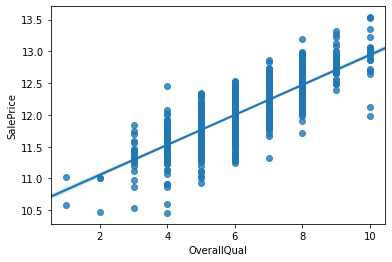

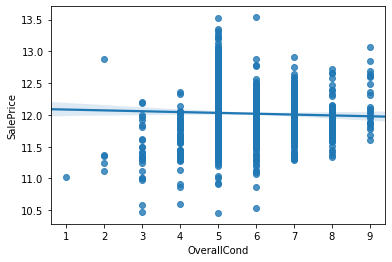

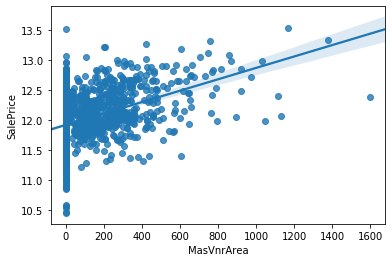

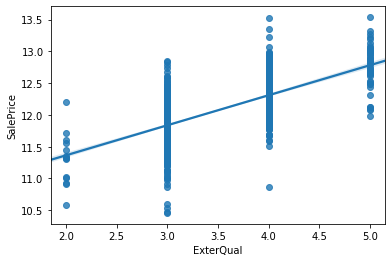

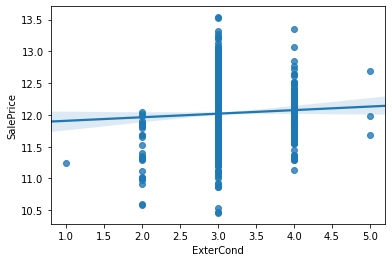

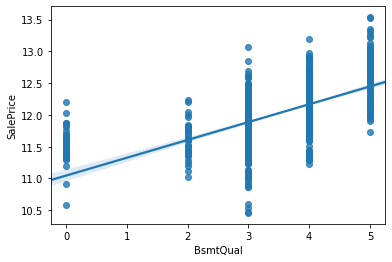

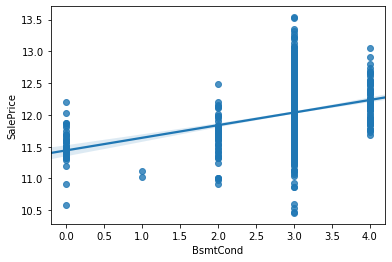

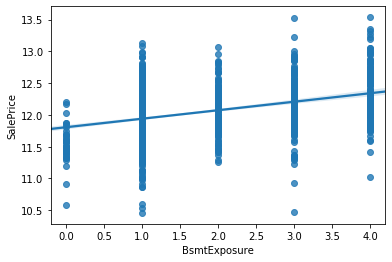

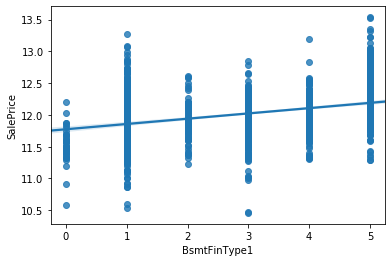

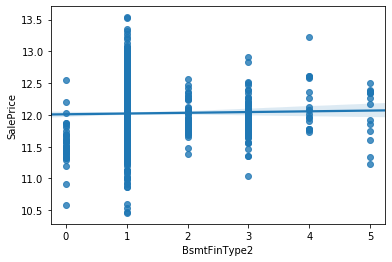

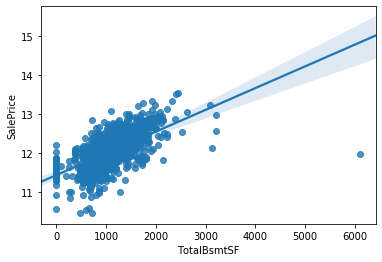

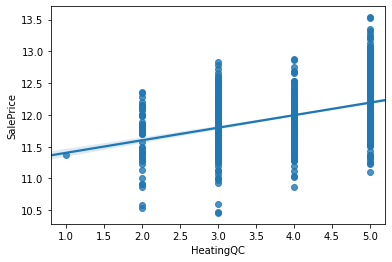

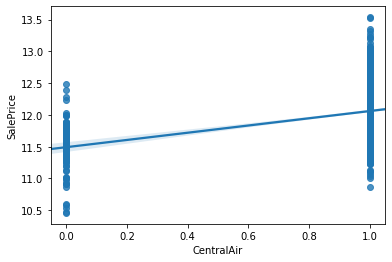

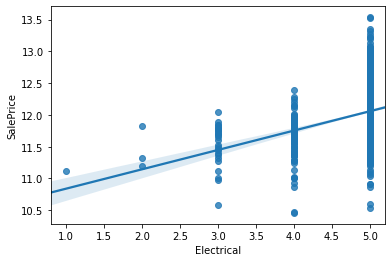

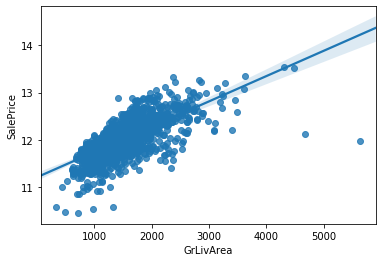

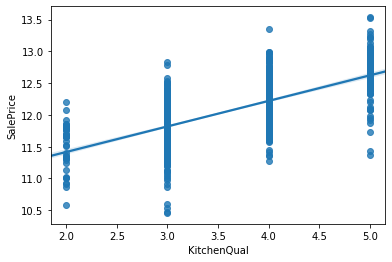

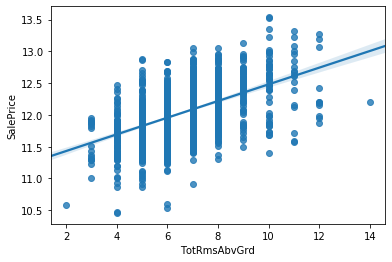

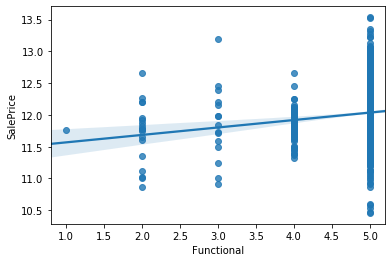

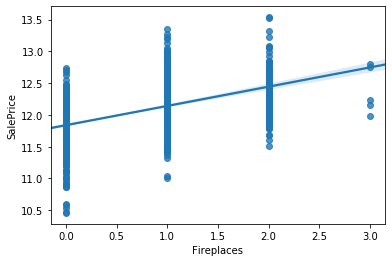

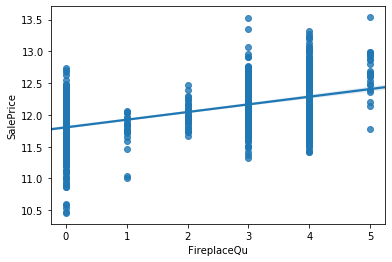

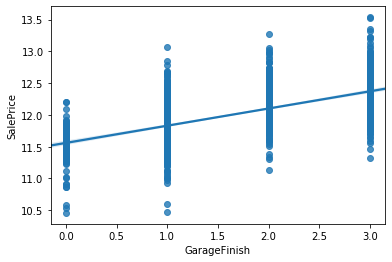

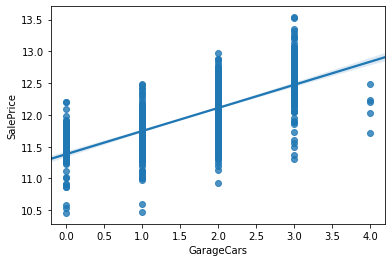

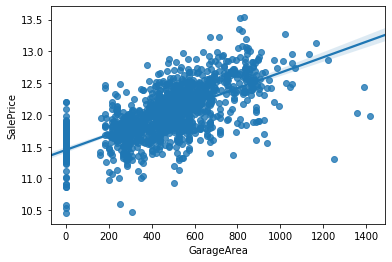

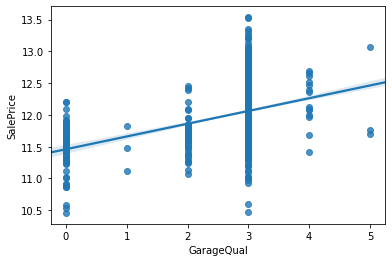

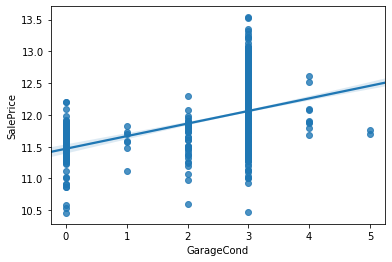

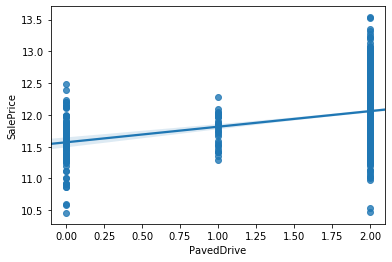

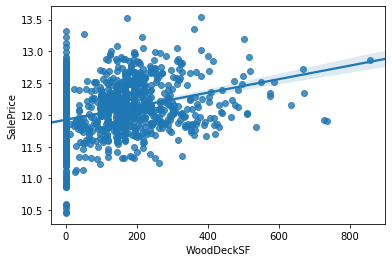

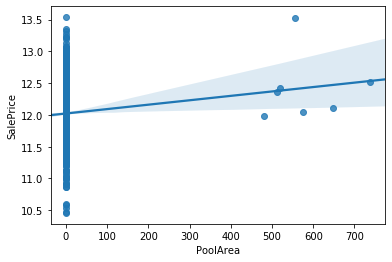

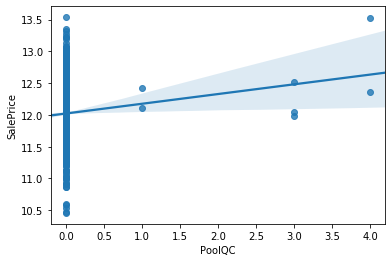

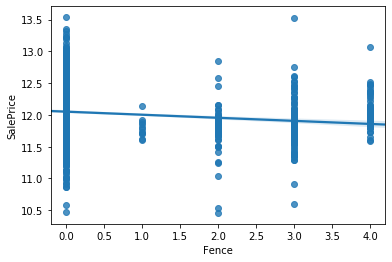

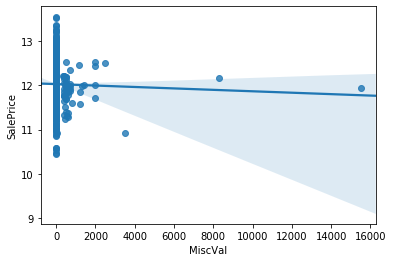

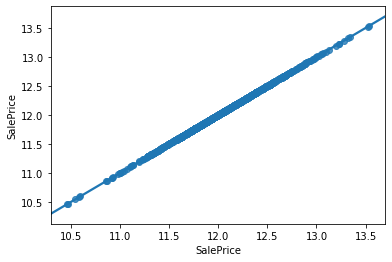

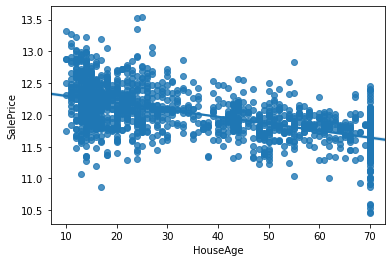

In [71]:
for i in dataset.columns.tolist()[1:34]:
    sns.regplot(x=i , y='SalePrice' , data=dataset)
    plt.show()

In [72]:
from scipy import stats
for i in dataset.columns:
    pearson_coef , p_value = stats.pearsonr(dataset[i] , dataset['SalePrice'])
    print(i)
    print(pearson_coef)
    print(p_value)
    print("")

Id
-0.01794244215659361
0.49331382469447654

OverallQual
0.8171846144867663
0.0

OverallCond
-0.03686845383480071
0.1591270006839557

MasVnrArea
0.4295316126249943
1.3024600098961863e-66

ExterQual
0.6788402517304442
8.30602737593996e-198

ExterCond
0.04931331923808572
0.05959317801735989

BsmtQual
0.6158037560867934
3.8421881897530423e-153

BsmtCond
0.2745427391575576
1.1673112564668984e-26

BsmtExposure
0.3574213757606147
3.1049675562758464e-45

BsmtFinType1
0.3451279449413351
4.232072858276604e-42

BsmtFinType2
0.021133465991644913
0.4197200183808002

TotalBsmtSF
0.6121342283262257
7.531828096458291e-151

HeatingQC
0.4737616042820037
1.475459798869881e-82

CentralAir
0.3515994501578207
9.859877510167776e-44

Electrical
0.3008249384230122
6.418305651170497e-32

GrLivArea
0.7009269871427148
3.0581511102488876e-216

KitchenQual
0.6678933348195357
2.9305331201676942e-189

TotRmsAbvGrd
0.5344224002094414
1.292526214527858e-108

Functional
0.13193724870867402
4.211780516829537e-07

Firepl

C:\Users\gopal\Anaconda3\lib\site-packages\scipy\stats\stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [73]:
dataset[['ExterCond','OverallCond','BsmtFinType2','PoolArea','PoolQC','Fence','MiscVal','NoYearSold','SalePrice']].corr()

,ExterCond,OverallCond,BsmtFinType2,PoolArea,PoolQC,Fence,MiscVal,NoYearSold,SalePrice
ExterCond,1.000000,0.389163,0.070935,0.044387,0.051784,0.069665,0.051649,-0.008053,0.049313
OverallCond,0.389163,1.000000,0.103844,-0.001985,-0.014885,0.169653,0.068777,-0.043950,-0.036868
BsmtFinType2,0.070935,0.103844,1.000000,0.020350,0.010008,0.135036,0.019336,-0.028715,0.021133
PoolArea,0.044387,-0.001985,0.020350,1.000000,0.899924,0.153518,0.029669,0.059689,0.069798
PoolQC,0.051784,-0.014885,0.010008,0.899924,1.000000,0.134553,0.007946,0.046786,0.078223
Fence,0.069665,0.169653,0.135036,0.153518,0.134553,1.000000,0.030416,-0.048068,-0.145725
MiscVal,0.051649,0.068777,0.019336,0.029669,0.007946,0.030416,1.000000,-0.004906,-0.020021
NoYearSold,-0.008053,-0.043950,-0.028715,0.059689,0.046786,-0.048068,-0.004906,1.000000,0.037263
SalePrice,0.049313,-0.036868,0.021133,0.069798,0.078223,-0.145725,-0.020021,0.037263,1.000000


In [74]:
x_data = dataset.drop(['Id','SalePrice'],axis=1)
x_data.shape

(1460, 175)

In [75]:
y_data = dataset['SalePrice']

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data , y_data , test_size = 0.3, random_state=1)

In [77]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [78]:
lm.score(x_train,y_train)

0.9302409986002547

In [79]:
lm.score(x_test,y_test)

0.8758186483268313

In [80]:
y_pred = lm.predict(x_test)

In [81]:
x_train.shape

(1022, 175)

In [82]:
from sklearn.metrics import mean_squared_error,r2_score
print("Mean Squared error : ", mean_squared_error(y_test , y_pred))
print("R2 : ", r2_score(y_test , y_pred))

Mean Squared error :  0.023468639847821465
R2 :  0.8758186483268313


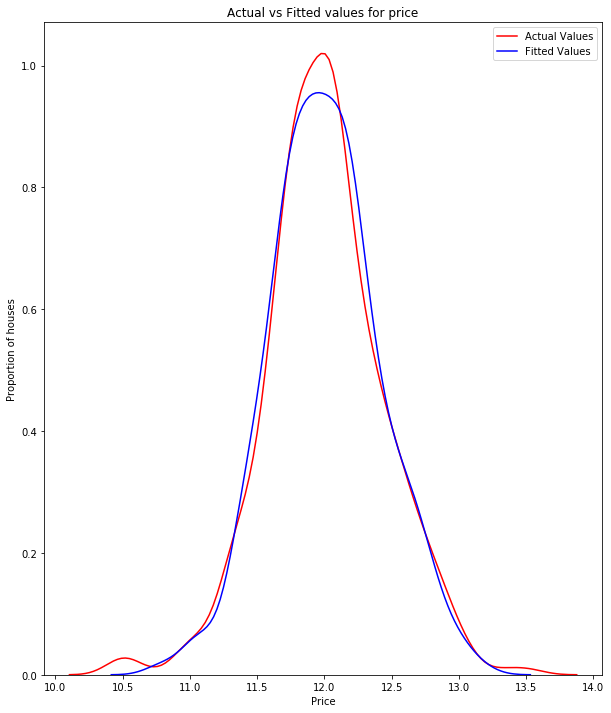

In [83]:
plt.figure(figsize = (10,12))
ax1 = sns.distplot(y_test , hist = False , color = 'r' , label = 'Actual Values')
sns.distplot(y_pred , hist = False , color = 'b' , label = 'Fitted Values' , ax = ax1)
plt.title("Actual vs Fitted values for price")
plt.xlabel("Price")
plt.ylabel("Proportion of houses")
plt.show()
plt.close()

In [84]:
x_data_mod = dataset.drop(['Id','ExterCond','OverallCond','BsmtFinType2','PoolArea','PoolQC','Fence','MiscVal','NoYearSold','SalePrice'],axis=1)
x_data_mod.shape

(1460, 167)

In [85]:
x_data_mod.head()

,OverallQual,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,TotalBsmtSF,HeatingQC,CentralAir,Electrical,GrLivArea,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,HouseAge,GarageAge,LotTotalArea,TotalBath,TotalPorchArea,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_Pos,Condition1_RR,Condition2_Feedr,Condition2_Norm,Condition2_Pos,Condition2_RR,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Other,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Other,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_150
0,7,196.0,4,4,3,1,5,856,5,1,5,1710,4,8,5,0,0,2,2,548,3,3,2,0,17,17.0,8515.0,4,61,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,6,0.0,3,4,3,4,4,1262,5,1,5,1262,3,6,5,1,3,2,2,460,3,3,2,298,44,44.0,9680.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,7,162.0,4,4,3,2,5,920,5,1,5,1786,4,6,5,1,3,2,2,608,3,3,2,0,18,19.0,11318.0,4,42,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,7,0.0,3,3,4,1,4,756,4,1,5,1717,4,7,5,1,4,1,3,642,3,3,2,0,50,22.0,9610.0,2,307,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,

In [86]:
from sklearn.model_selection import train_test_split
x_train_mod,x_test_mod,y_train_mod,y_test_mod = train_test_split(x_data_mod , y_data , test_size = 0.3, random_state=1)

In [87]:
from sklearn.linear_model import LinearRegression
lm_mod = LinearRegression()
lm_mod.fit(x_train_mod,y_train_mod)

LinearRegression()

In [88]:
lm_mod.score(x_train_mod,y_train_mod)

0.9250324796334155

In [89]:
lm_mod.score(x_test_mod,y_test_mod)

0.8897905665611455

In [90]:
y_pred_mod = lm_mod.predict(x_test_mod)

In [91]:
from sklearn.metrics import mean_squared_error,r2_score
print("Mean Squared error : ", mean_squared_error(y_test_mod , y_pred_mod))
print("R2 : ", r2_score(y_test_mod , y_pred_mod))

Mean Squared error :  0.02082813132857671
R2 :  0.8897905665611455


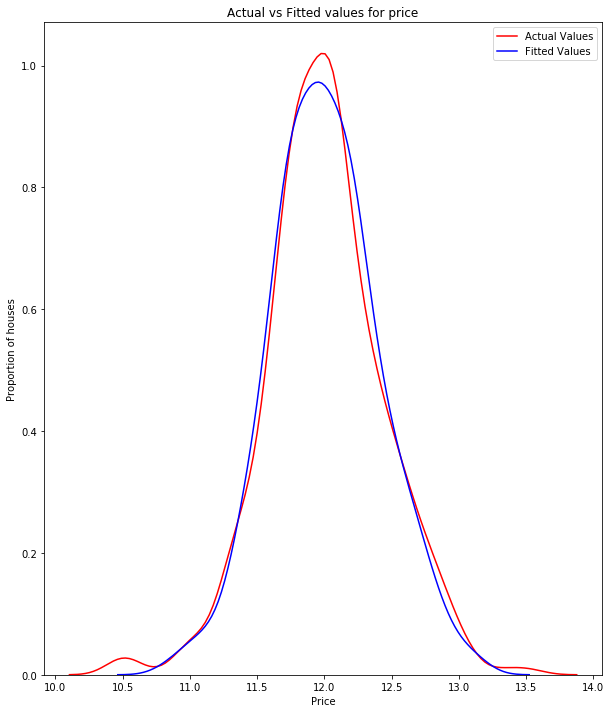

In [92]:
plt.figure(figsize = (10,12))
ax1 = sns.distplot(y_test_mod , hist = False , color = 'r' , label = 'Actual Values')
sns.distplot(y_pred_mod , hist = False , color = 'b' , label = 'Fitted Values' , ax = ax1)
plt.title("Actual vs Fitted values for price")
plt.xlabel("Price")
plt.ylabel("Proportion of houses")
plt.show()
plt.close()

In [93]:
pred_dataset = pd.read_csv('x_test_final_clean.csv')

In [94]:
pred_dataset.head()

,Unnamed: 0,Id,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,CentralAir,Electrical,GrLivArea,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,Fence,MiscVal,HouseAge,GarageAge,NoYearSold,LotTotalArea,TotalBath,TotalPorchArea,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_Pos,Condition1_RR,Condition2_Feedr,Condition2_Norm,Condition2_Pos,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Other,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,RoofMatl_Other,MiscFeature_TenC,HouseStyle_2.5Fin,Condition2_RR
0,0,1461,5,6,0.0,3,3,3,3,1,3,2,882.0,3,1,5,896,3,5,5,0,0,1,1.0,730.0,3,3,2,140,0,0,3,0,59,59,10,11702.0,1.0,120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,1,1462,6,6,108.0,3,3,3,3,1,4,1,1329.0,3,1,5,1329,4,6,5,0,0,1,1.0,312.0,3,3,2,393,0,0,0,12500,62,62,10,14348.0,2.0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,2,1463,5,5,0.0,3,3,4,3,1,5,1,928.0,4,1,5,1629,3,6,5,1,3,3,2.0,482.0,3,3,2,212,0,0,3,0,22,23,10,13904.0,3.0,34,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,3,1464,6,6,20.0,3,3,3,3,1,5,1,926.0,5,1,5

In [95]:
pred_dataset.drop(['Unnamed: 0'],axis=1,inplace=True)

In [96]:
pred_dataset.head()

,Id,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,CentralAir,Electrical,GrLivArea,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,Fence,MiscVal,HouseAge,GarageAge,NoYearSold,LotTotalArea,TotalBath,TotalPorchArea,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_Pos,Condition1_RR,Condition2_Feedr,Condition2_Norm,Condition2_Pos,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Other,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,RoofMatl_Other,MiscFeature_TenC,HouseStyle_2.5Fin,Condition2_RR
0,1461,5,6,0.0,3,3,3,3,1,3,2,882.0,3,1,5,896,3,5,5,0,0,1,1.0,730.0,3,3,2,140,0,0,3,0,59,59,10,11702.0,1.0,120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,1462,6,6,108.0,3,3,3,3,1,4,1,1329.0,3,1,5,1329,4,6,5,0,0,1,1.0,312.0,3,3,2,393,0,0,0,12500,62,62,10,14348.0,2.0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,1463,5,5,0.0,3,3,4,3,1,5,1,928.0,4,1,5,1629,3,6,5,1,3,3,2.0,482.0,3,3,2,212,0,0,3,0,22,23,10,13904.0,3.0,34,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,1464,6,6,20.0,3,3,3,3,1,5,1,926.0,5,1,5,1604,4,7,5,1,4,3,2

In [97]:
pred_dataset.shape

(1459, 176)

In [98]:
x_pred_data = pred_dataset.drop(['Id'],axis=1)

In [99]:
np.setdiff1d(x_pred_data.columns.tolist() , x_test.columns.tolist())

array([], dtype='<U21')

In [100]:
#x_pred_data.drop(['MSSubClass_150'],axis=1,inplace=True)

In [101]:
x_pred_data.shape

(1459, 175)

In [102]:
y_predictions = lm.predict(x_pred_data)

In [103]:
x_pred_data_mod = pred_dataset.drop(['Id','ExterCond','OverallCond','BsmtFinType2','PoolArea','PoolQC','Fence','MiscVal','NoYearSold'],axis=1)

In [104]:
x_pred_data_mod.shape

(1459, 167)

In [105]:
np.setdiff1d(x_pred_data_mod.columns.tolist() , x_test_mod.columns.tolist())

array([], dtype='<U21')

In [106]:
#x_pred_data_mod.drop(['MSSubClass_150'],axis=1,inplace=True)

In [107]:
y_predictions_mod = lm_mod.predict(x_pred_data_mod)

In [108]:
y_predictions = np.expm1(y_predictions)
y_predictions_mod = np.expm1(y_predictions_mod)

In [109]:
Id = pred_dataset['Id'].to_list()
y = y_predictions.tolist()
list_of_tuples = list(zip(Id,y))
df = pd.DataFrame(list_of_tuples, columns = ['Id', 'SalePrice'])
df.to_csv("finalSolution.csv")

In [110]:
Id = pred_dataset['Id'].to_list()
y = y_predictions_mod.tolist()
list_of_tuples = list(zip(Id,y))
df = pd.DataFrame(list_of_tuples, columns = ['Id', 'SalePrice'])
df.to_csv("finalSolution_mod.csv")

In [111]:
from sklearn.linear_model import Ridge
rd = Ridge()
rd_mod = Ridge()

In [112]:
rd.fit(x_train,y_train)

Ridge()

In [113]:
rd_mod.fit(x_train_mod,y_train_mod)

Ridge()

In [114]:
y_pred_rr = rd.predict(x_test)

In [115]:
y_pred_mod_rr = rd_mod.predict(x_test_mod)

In [116]:
print(rd.score(x_train,y_train))
print(rd.score(x_test,y_test))

0.9277496465975752
0.8807235183115814


In [117]:
print(rd_mod.score(x_train_mod,y_train_mod))
print(rd_mod.score(x_test_mod,y_test_mod))

0.9223353165545829
0.8823683972499884


In [118]:
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_test, y_pred_rr))
print(mean_squared_error(y_test,y_pred_rr))
print(r2_score(y_test_mod, y_pred_mod_rr))
print(mean_squared_error(y_test_mod,y_pred_mod_rr))

0.8807235183115814
0.02254168402376628
0.8823683972499884
0.02223082356944992


In [119]:
y_predictions_rr = rd.predict(x_pred_data)

In [120]:
y_predictions_rr_mod = rd_mod.predict(x_pred_data_mod)

In [121]:
y_predictions_rr = np.expm1(y_predictions_rr)
y_predictions_rr_mod = np.expm1(y_predictions_rr_mod)

In [122]:
Id = pred_dataset['Id'].to_list()
y = y_predictions_rr.tolist()
list_of_tuples = list(zip(Id,y))
df = pd.DataFrame(list_of_tuples, columns = ['Id', 'SalePrice'])
df.to_csv("finalSolution_rr.csv")

In [123]:
Id = pred_dataset['Id'].to_list()
y = y_predictions_rr_mod.tolist()
list_of_tuples = list(zip(Id,y))
df = pd.DataFrame(list_of_tuples, columns = ['Id', 'SalePrice'])
df.to_csv("finalSolution_rrmod.csv")

In [131]:
feature_importances = pd.DataFrame(rd_mod.coef_,
                                   index = x_train_mod.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Neighborhood_StoneBr,0.161205
MSZoning_RH,0.138779
Neighborhood_Crawfor,0.128011
Neighborhood_NridgHt,0.124827
GarageType_None,0.124582
RoofMatl_WdShngl,0.118494
SaleType_Oth,0.109156
SaleCondition_Alloca,0.095263
SaleType_New,0.089743
SaleCondition_AdjLand,0.088404
